In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
train_data = pd.read_parquet('../../data/initial_modelling/train_X_data_last_month.parquet').drop(columns=['S_2'])
val_data = pd.read_parquet('../../data/initial_modelling/val_X_data_last_month.parquet').drop(columns=['S_2'])
test_data = pd.read_parquet('../../data/initial_modelling/test_X_data_last_month.parquet').drop(columns=['S_2'])

In [3]:
y_train = train_data['target'].values
y_val = val_data['target'].values
y_test = test_data['target'].values

In [4]:
train_data.head()

,customer_ID,D_39,B_1,R_1,B_4,B_5,R_2,D_47,B_7,D_51,B_9,R_3,B_10,S_5,B_11,S_6,R_4,B_12,S_8,R_5,D_58,B_14,D_60,S_11,D_63,D_65,B_18,S_12,R_6,S_13,B_21,D_71,S_15,B_23,P_4,D_75,B_24,R_7,R_8,S_16,R_10,R_11,S_17,R_12,B_28,R_13,R_14,R_15,R_16,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,R_22,R_23,D_92,D_93,D_94,R_24,R_25,D_96,S_26,D_102,B_36,B_37,B_40,D_126,D_127,B_41,D_133,R_28,D_140,D_144,target,end_of_month
0,a6bce6027f34a537dd3791ede37dcd3bf7017d571e3b8a...,0.295018,0.094310,0.005200,0.170079,0.017262,0.003640,0.422436,0.127707,0.341604,0.125312,0.004692,0.071775,0.235043,0.078684,0.004515,0.006753,0.058883,0.601257,0.003425,0.345972,0.105318,0.251269,0.247217,CO,0.004360,0.154858,0.186974,0.000019,0.005839,0.009161,0.021786,0.102641,0.121351,0.007689,0.273959,0.005502,0.005441,0.007421,0.009395,0.005316,0.005898,0.000883,1.001456,0.191578,0.008755,0.009521,0.005977,0.003511,0.009176,0.007875,0.000052,0.006334,1,0.008895,0.001252,0.002409,0.008441,0.001943,0.005561,0.002614,0.008909,0.009994,0.000964,0.003467,0.005961,0.007027,0.009298,0.013673,0.007749,0.008019,0.093438,0.107051,1.0,0.005854,0.009274,0.006256,0.007657,0.003406,0.004150,0,2018-03-31
1,22b6b23f06a467df6633cbcf3e3fb7e8a99c692e19d500...,0.007106,0.013758,0.000326,0.058616,0.018488,0.008559,0.322846,0.028203,0.343203,0.012959,0.004589,0.263159,0.011265,0.009033,0.001358,0.002491,0.041200,0.473390,0.009546,0.076971,0.007563,0.057779,0.366408,CO,0.000119,0.689683,0.186860,0.002666,0.004748,0.007384,0.010354,0.200859,0.022039,0.007445,0.068089,0.003663,0.008071,0.006521,0.001118,0.000364,0.001478,0.000421,1.006366,0.033385,0.008700,0.004947,0.004894,0.009017,0.002797,0.007823,0.000741,0.000220,1,0.007795,0.000372,0.008684,0.004150,0.002847,0.001371,0.003795,0.009797,0.006759,0.004067,0.009560,0.001706,0.000086,0.001236,0.000889,0.006854,0.001334,0.012753,0.041467,1.0,0.006169,0.003988,0.006433,0.006456,0.006752,0.000011,0,2018-03-31
2,baac3615b0e82e210320261b87b2e8e552805f5b66f0d2...,0.005607,0.008563,0.004398,0.000113,0.015878,0.002745,0.104074,0.013242,0.006555,0.330256,0.104061,0.295833,0.017091,0.008180,0.001898,0.003361,0.033083,0.601631,0.000359,0.004538,0.004191,1.000364,0.169808,CO,0.008948,1.003902,0.287095,0.006800,0.005356,0.005840,0.007722,0.102527,0.007286,0.999273,0.004058,0.009057,0.006252,0.008540,0.005612,0.007738,0.004642,0.005338,1.008499,0.002226,0.002190,0.006216,0.002994,0.006577,0.003979,0.001129,0.009506,0.006459,1,0.008492,0.004421,0.007168,0.007949,0.004306,0.001701,0.005752,0.003761,0.003694,0.000407,0.003953,0.004679,0.002599,0.002287,0.005127,0.316072,0.009153,0.012228,0.005069,0.0,0.001408,0.007990,0.004747,0.003762,0.008673,0.004924,0,2018-03-31
3,ca8cba88feeed4b3759eba6f32c12192025691826cdeff...,0.005659,0.000993,0.000691,0.008777,0.005575,0.003091,0.161946,0.001729,0.002436,0.003744,0.104539,0.241943,0.004174,0.002968,0.005034,0.006416,0.055979,0.000049,0.005212,0.000319,0.006942,1.000362,0.281841,CO,0.005681,1.000472,0.184539,0.003959,0.009599,0.008062,0.017003,0.502531,0.001163,0.005453,0.004132,0.006190,0.005042,0.004440,0.002743,0.003000,0.006849,0.008812,1.008704,0.003923,0.009735,0.004162,0.003434,0.009959,0.004921,0.003618,0.002154,0.001943,1,0.001330,0.008947,0.002850,0.002231,0.005219,0.008728,0.009430,0.003600,0.004968,0.007001,0.005342,0.000502,0.008984,0.007908,0.004083,0.004144,0.009074,0.007877,0.006503,0.0,0.006878,0.004739,0.009892,0.007765,0.003798,0.008975,0,2018-03-31
4,834dfa4bb957dabcbc2d9e90f8998b9cf40bcc35f38536...,0.000834,0.005034,0.005587,0.046676,0.000355,0.008184,0.698026,0.031777,0.003444,0.006110,0.002101,0.302109,0.009895,0.002688,1.004870,0.004282,0.013202,0.000988,0.006162,0.000046,0.008121,0.001122,0.282537,CO,0.007983,1.007565,0.192542,0.008761,0.007706,0.006156,0.013267,0.505820,0.020652,0.006029,0.002928,0.005833,0.003131,0.000861,0.001115,0.002127,0.004550,0.008325,1.001936,0.015701,0.009775,0.000839,0.000164,0.002851,0.005621,0.006739,0.004563,0.000310,1,0.006139,0.009859,0.006603,0.004136

In [5]:
cat_cols = ['D_126', 'D_63']
train_data[cat_cols] = train_data[cat_cols].astype('category')
test_data[cat_cols] = test_data[cat_cols].astype('category')

In [6]:
train_data.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289115 entries, 0 to 289114
Data columns (total 82 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   customer_ID   289115 non-null  string        
 1   D_39          289115 non-null  float32       
 2   B_1           289115 non-null  float32       
 3   R_1           289115 non-null  float32       
 4   B_4           289115 non-null  float32       
 5   B_5           289115 non-null  float32       
 6   R_2           289115 non-null  float32       
 7   D_47          289115 non-null  float32       
 8   B_7           289115 non-null  float32       
 9   D_51          289115 non-null  float32       
 10  B_9           289115 non-null  float32       
 11  R_3           289115 non-null  float32       
 12  B_10          289115 non-null  float32       
 13  S_5           289115 non-null  float32       
 14  B_11          289115 non-null  float32       
 15  S_6           289

In [7]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

def one_hot_encode_categories(df, categorical_columns=None, drop_original=True, handle_unknown='error'):
    """
    One-hot encode categorical columns in a DataFrame.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing categorical columns
    categorical_columns : list or None
        List of categorical column names to encode. If None, automatically detects categorical columns.
    drop_original : bool
        Whether to drop the original categorical columns
    handle_unknown : str
        Strategy for handling unknown categories in new data: 'error', 'ignore' or 'infrequent_if_exist'
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with one-hot encoded columns
    OneHotEncoder
        Fitted encoder for future transformations
    """
    # Make a copy to avoid modifying the original
    result_df = df.copy()
    
    # Automatically detect categorical columns if not specified
    if categorical_columns is None:
        categorical_columns = result_df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    if not categorical_columns:
        print("No categorical columns found to encode.")
        return result_df, None
        
    # Initialize the encoder
    encoder = OneHotEncoder(sparse_output=False, handle_unknown=handle_unknown, drop='if_binary')
    
    # Fit and transform the categorical columns
    encoded_array = encoder.fit_transform(result_df[categorical_columns])
    
    # Get feature names
    feature_names = encoder.get_feature_names_out(categorical_columns)
    
    # Create a DataFrame with the encoded features
    encoded_df = pd.DataFrame(encoded_array, columns=feature_names, index=result_df.index)
    
    # Combine with the original DataFrame
    if drop_original:
        # Drop the original categorical columns
        result_df = result_df.drop(columns=categorical_columns)
    
    # Concatenate the encoded columns with the original DataFrame
    result_df = pd.concat([result_df, encoded_df], axis=1)
    
    print(f"One-hot encoded {len(categorical_columns)} categorical columns into {len(feature_names)} binary features.")
    
    return result_df, encoder

In [8]:
# Apply to your training data
train_data_oh, encoder = one_hot_encode_categories(train_data, handle_unknown='ignore')

One-hot encoded 2 categorical columns into 7 binary features.


In [9]:
train_data_oh.head()

,customer_ID,D_39,B_1,R_1,B_4,B_5,R_2,D_47,B_7,D_51,B_9,R_3,B_10,S_5,B_11,S_6,R_4,B_12,S_8,R_5,D_58,B_14,D_60,S_11,D_65,B_18,S_12,R_6,S_13,B_21,D_71,S_15,B_23,P_4,D_75,B_24,R_7,R_8,S_16,R_10,R_11,S_17,R_12,B_28,R_13,R_14,R_15,R_16,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,R_22,R_23,D_92,D_93,D_94,R_24,R_25,D_96,S_26,D_102,B_36,B_37,B_40,D_127,B_41,D_133,R_28,D_140,D_144,target,end_of_month,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_126_1.0
0,a6bce6027f34a537dd3791ede37dcd3bf7017d571e3b8a...,0.295018,0.094310,0.005200,0.170079,0.017262,0.003640,0.422436,0.127707,0.341604,0.125312,0.004692,0.071775,0.235043,0.078684,0.004515,0.006753,0.058883,0.601257,0.003425,0.345972,0.105318,0.251269,0.247217,0.004360,0.154858,0.186974,0.000019,0.005839,0.009161,0.021786,0.102641,0.121351,0.007689,0.273959,0.005502,0.005441,0.007421,0.009395,0.005316,0.005898,0.000883,1.001456,0.191578,0.008755,0.009521,0.005977,0.003511,0.009176,0.007875,0.000052,0.006334,1,0.008895,0.001252,0.002409,0.008441,0.001943,0.005561,0.002614,0.008909,0.009994,0.000964,0.003467,0.005961,0.007027,0.009298,0.013673,0.007749,0.008019,0.093438,0.107051,0.005854,0.009274,0.006256,0.007657,0.003406,0.004150,0,2018-03-31,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,22b6b23f06a467df6633cbcf3e3fb7e8a99c692e19d500...,0.007106,0.013758,0.000326,0.058616,0.018488,0.008559,0.322846,0.028203,0.343203,0.012959,0.004589,0.263159,0.011265,0.009033,0.001358,0.002491,0.041200,0.473390,0.009546,0.076971,0.007563,0.057779,0.366408,0.000119,0.689683,0.186860,0.002666,0.004748,0.007384,0.010354,0.200859,0.022039,0.007445,0.068089,0.003663,0.008071,0.006521,0.001118,0.000364,0.001478,0.000421,1.006366,0.033385,0.008700,0.004947,0.004894,0.009017,0.002797,0.007823,0.000741,0.000220,1,0.007795,0.000372,0.008684,0.004150,0.002847,0.001371,0.003795,0.009797,0.006759,0.004067,0.009560,0.001706,0.000086,0.001236,0.000889,0.006854,0.001334,0.012753,0.041467,0.006169,0.003988,0.006433,0.006456,0.006752,0.000011,0,2018-03-31,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,baac3615b0e82e210320261b87b2e8e552805f5b66f0d2...,0.005607,0.008563,0.004398,0.000113,0.015878,0.002745,0.104074,0.013242,0.006555,0.330256,0.104061,0.295833,0.017091,0.008180,0.001898,0.003361,0.033083,0.601631,0.000359,0.004538,0.004191,1.000364,0.169808,0.008948,1.003902,0.287095,0.006800,0.005356,0.005840,0.007722,0.102527,0.007286,0.999273,0.004058,0.009057,0.006252,0.008540,0.005612,0.007738,0.004642,0.005338,1.008499,0.002226,0.002190,0.006216,0.002994,0.006577,0.003979,0.001129,0.009506,0.006459,1,0.008492,0.004421,0.007168,0.007949,0.004306,0.001701,0.005752,0.003761,0.003694,0.000407,0.003953,0.004679,0.002599,0.002287,0.005127,0.316072,0.009153,0.012228,0.005069,0.001408,0.007990,0.004747,0.003762,0.008673,0.004924,0,2018-03-31,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ca8cba88feeed4b3759eba6f32c12192025691826cdeff...,0.005659,0.000993,0.000691,0.008777,0.005575,0.003091,0.161946,0.001729,0.002436,0.003744,0.104539,0.241943,0.004174,0.002968,0.005034,0.006416,0.055979,0.000049,0.005212,0.000319,0.006942,1.000362,0.281841,0.005681,1.000472,0.184539,0.003959,0.009599,0.008062,0.017003,0.502531,0.001163,0.005453,0.004132,0.006190,0.005042,0.004440,0.002743,0.003000,0.006849,0.008812,1.008704,0.003923,0.009735,0.004162,0.003434,0.009959,0.004921,0.003618,0.002154,0.001943,1,0.001330,0.008947,0.002850,0.002231,0.005219,0.008728,0.009430,0.003600,0.004968,0.007001,0.005342,0.000502,0.008984,0.007908,0.004083,0.004144,0.009074,0.007877,0.006503,0.006878,0.004739,0.009892,0.007765,0.003798,0.008975,0,2018-03-31,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,834dfa4bb957dabcbc2d9e90f8998b9cf40bcc35f38536...,0.000834,0.005034,0.005587,0.046676,0.000355,0.008184,0.698026,0.031777,0.003444,0.006110,0.002101,0.302109,0.009895,0.002688,1.004870,0.004282,0.013202,0.000988,0.006162,0.000046,0.008121,0.001122,0.282537,0.007983,1.007565,0.192542,0.008761,0.007706,0.006156,0.013267,0.505820,0.020652,0.006029,0.002928,0.005833,0.003131,0.000861,0.001115,0.002127,0.004550,0.008325

In [10]:
encoder.feature_names_in_

array(['D_63', 'D_126'], dtype=object)

In [11]:
encoder.transform(test_data[encoder.feature_names_in_])

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [12]:
val_data_oh = pd.concat([val_data.drop(columns=encoder.feature_names_in_),pd.DataFrame(encoder.transform(val_data[encoder.feature_names_in_]), columns=encoder.get_feature_names_out(),index=val_data.index)], axis=1)
test_data_oh = pd.concat([test_data.drop(columns=encoder.feature_names_in_),pd.DataFrame(encoder.transform(test_data[encoder.feature_names_in_]), columns=encoder.get_feature_names_out(),index=test_data.index)], axis=1)

In [13]:
test_data_oh.shape, val_data_oh.shape, train_data_oh.shape

((137674, 87), (32124, 87), (289115, 87))

In [14]:
train_data_oh.drop(columns=['end_of_month', 'target']).to_parquet('../../data/initial_modelling/train_X_data_last_month_oh.parquet', index = False)
val_data_oh.drop(columns=['end_of_month', 'target']).to_parquet('../../data/initial_modelling/val_X_data_last_month_oh.parquet', index = False)
test_data_oh.drop(columns=['end_of_month', 'target']).to_parquet('../../data/initial_modelling/test_X_data_last_month_oh.parquet', index = False)

In [15]:
drop_cols = ['customer_ID', 'target', 'end_of_month']

In [16]:
X_train = train_data_oh.drop(columns = drop_cols)
X_val = val_data_oh.drop(columns = drop_cols)
X_test = test_data_oh.drop(columns = drop_cols)

In [17]:
X_train.shape

(289115, 84)

In [18]:
X_train.head()

,D_39,B_1,R_1,B_4,B_5,R_2,D_47,B_7,D_51,B_9,R_3,B_10,S_5,B_11,S_6,R_4,B_12,S_8,R_5,D_58,B_14,D_60,S_11,D_65,B_18,S_12,R_6,S_13,B_21,D_71,S_15,B_23,P_4,D_75,B_24,R_7,R_8,S_16,R_10,R_11,S_17,R_12,B_28,R_13,R_14,R_15,R_16,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,R_22,R_23,D_92,D_93,D_94,R_24,R_25,D_96,S_26,D_102,B_36,B_37,B_40,D_127,B_41,D_133,R_28,D_140,D_144,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_126_1.0
0,0.295018,0.094310,0.005200,0.170079,0.017262,0.003640,0.422436,0.127707,0.341604,0.125312,0.004692,0.071775,0.235043,0.078684,0.004515,0.006753,0.058883,0.601257,0.003425,0.345972,0.105318,0.251269,0.247217,0.004360,0.154858,0.186974,0.000019,0.005839,0.009161,0.021786,0.102641,0.121351,0.007689,0.273959,0.005502,0.005441,0.007421,0.009395,0.005316,0.005898,0.000883,1.001456,0.191578,0.008755,0.009521,0.005977,0.003511,0.009176,0.007875,0.000052,0.006334,1,0.008895,0.001252,0.002409,0.008441,0.001943,0.005561,0.002614,0.008909,0.009994,0.000964,0.003467,0.005961,0.007027,0.009298,0.013673,0.007749,0.008019,0.093438,0.107051,0.005854,0.009274,0.006256,0.007657,0.003406,0.004150,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.007106,0.013758,0.000326,0.058616,0.018488,0.008559,0.322846,0.028203,0.343203,0.012959,0.004589,0.263159,0.011265,0.009033,0.001358,0.002491,0.041200,0.473390,0.009546,0.076971,0.007563,0.057779,0.366408,0.000119,0.689683,0.186860,0.002666,0.004748,0.007384,0.010354,0.200859,0.022039,0.007445,0.068089,0.003663,0.008071,0.006521,0.001118,0.000364,0.001478,0.000421,1.006366,0.033385,0.008700,0.004947,0.004894,0.009017,0.002797,0.007823,0.000741,0.000220,1,0.007795,0.000372,0.008684,0.004150,0.002847,0.001371,0.003795,0.009797,0.006759,0.004067,0.009560,0.001706,0.000086,0.001236,0.000889,0.006854,0.001334,0.012753,0.041467,0.006169,0.003988,0.006433,0.006456,0.006752,0.000011,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.005607,0.008563,0.004398,0.000113,0.015878,0.002745,0.104074,0.013242,0.006555,0.330256,0.104061,0.295833,0.017091,0.008180,0.001898,0.003361,0.033083,0.601631,0.000359,0.004538,0.004191,1.000364,0.169808,0.008948,1.003902,0.287095,0.006800,0.005356,0.005840,0.007722,0.102527,0.007286,0.999273,0.004058,0.009057,0.006252,0.008540,0.005612,0.007738,0.004642,0.005338,1.008499,0.002226,0.002190,0.006216,0.002994,0.006577,0.003979,0.001129,0.009506,0.006459,1,0.008492,0.004421,0.007168,0.007949,0.004306,0.001701,0.005752,0.003761,0.003694,0.000407,0.003953,0.004679,0.002599,0.002287,0.005127,0.316072,0.009153,0.012228,0.005069,0.001408,0.007990,0.004747,0.003762,0.008673,0.004924,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.005659,0.000993,0.000691,0.008777,0.005575,0.003091,0.161946,0.001729,0.002436,0.003744,0.104539,0.241943,0.004174,0.002968,0.005034,0.006416,0.055979,0.000049,0.005212,0.000319,0.006942,1.000362,0.281841,0.005681,1.000472,0.184539,0.003959,0.009599,0.008062,0.017003,0.502531,0.001163,0.005453,0.004132,0.006190,0.005042,0.004440,0.002743,0.003000,0.006849,0.008812,1.008704,0.003923,0.009735,0.004162,0.003434,0.009959,0.004921,0.003618,0.002154,0.001943,1,0.001330,0.008947,0.002850,0.002231,0.005219,0.008728,0.009430,0.003600,0.004968,0.007001,0.005342,0.000502,0.008984,0.007908,0.004083,0.004144,0.009074,0.007877,0.006503,0.006878,0.004739,0.009892,0.007765,0.003798,0.008975,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000834,0.005034,0.005587,0.046676,0.000355,0.008184,0.698026,0.031777,0.003444,0.006110,0.002101,0.302109,0.009895,0.002688,1.004870,0.004282,0.013202,0.000988,0.006162,0.000046,0.008121,0.001122,0.282537,0.007983,1.007565,0.192542,0.008761,0.007706,0.006156,0.013267,0.505820,0.020652,0.006029,0.002928,0.005833,0.003131,0.000861,0.001115,0.002127,0.004550,0.008325,1.001936,0.015701,0.009775,0.000839,0.000164,0.002851,0.005621,0.006739,0.004563,0.000310,1,0.006139,0.009859,0.006603,0.004136,0.005951,0.007638,0.003829,0.005229,0.005499,0.003417,0.009155,0.007836,0.008184,0.008785,0.009288,0.505266,0.008412,0.000782,0.035965,0.008331,0.000707,0.007553,0.004204,0.009497,0.002808,0.0,1.0,0.0,0.0,

In [19]:
X_val.head(10)

,D_39,B_1,R_1,B_4,B_5,R_2,D_47,B_7,D_51,B_9,R_3,B_10,S_5,B_11,S_6,R_4,B_12,S_8,R_5,D_58,B_14,D_60,S_11,D_65,B_18,S_12,R_6,S_13,B_21,D_71,S_15,B_23,P_4,D_75,B_24,R_7,R_8,S_16,R_10,R_11,S_17,R_12,B_28,R_13,R_14,R_15,R_16,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,R_22,R_23,D_92,D_93,D_94,R_24,R_25,D_96,S_26,D_102,B_36,B_37,B_40,D_127,B_41,D_133,R_28,D_140,D_144,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_126_1.0
0,0.001672,0.005188,0.009366,0.001294,0.008911,0.008567,0.242734,0.009670,0.004676,0.006376,0.007989,0.237095,0.004696,0.007281,1.009418,0.009051,0.009762,0.005873,0.009246,0.003226,0.008212,1.001973,0.281232,0.005724,1.007102,0.188369,0.008953,0.006374,0.001793,0.007862,0.504451,0.008021,0.007900,0.001477,0.002503,0.000712,0.005783,0.007029,0.001301,0.006079,0.002086,1.007436,0.004593,0.009583,0.002098,0.004590,0.002258,0.007122,0.002242,0.004192,0.006156,1,0.006517,0.001882,0.001362,0.001446,0.006670,0.008678,0.005204,0.000209,0.003262,0.008084,0.009534,0.003434,0.005336,0.001590,0.009988,0.005251,0.002806,0.008213,0.001515,0.009355,0.004026,0.005988,0.004742,0.009732,0.205211,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.420352,0.031960,0.002225,0.035561,0.010599,0.000942,0.101764,0.034316,0.006136,0.016160,0.005280,0.300955,0.008938,0.013443,0.005331,0.002911,0.027829,0.408114,0.008509,0.007167,0.019749,0.092397,0.963752,0.002052,1.004892,0.288702,0.005012,0.403595,0.006960,0.008535,0.300412,0.025808,0.002919,0.003856,0.005936,0.006340,0.000275,0.005439,0.008588,0.008227,0.002646,1.005649,0.066157,0.000337,0.001202,0.007498,0.000040,0.009766,0.005014,0.000123,0.003355,1,0.006528,0.004266,0.003619,0.001605,0.008023,0.004698,0.004154,0.001158,0.006590,0.005622,0.009932,0.003718,0.000948,0.009049,0.008403,0.000434,0.009865,0.029769,0.035614,1.005013,0.002145,0.006932,0.001429,0.003010,0.006592,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.000878,0.008073,0.000128,0.007653,0.006406,0.006176,0.443533,0.002133,0.002377,0.004103,0.008911,0.239413,0.006378,0.002042,1.007340,0.002030,0.007067,0.003666,0.005364,0.009714,0.009541,1.002455,0.281869,0.005645,1.005817,0.190173,0.008147,0.002074,0.004706,0.014830,0.505617,0.008820,0.007738,0.006817,0.007049,0.002470,0.004511,0.000380,0.000334,0.001390,0.001924,1.000497,0.008246,0.000481,0.007424,0.009645,0.006573,0.004153,0.004596,0.004586,0.009678,1,0.004827,0.002394,0.007624,0.002087,0.006155,0.005621,0.008221,0.000974,0.001925,0.004971,0.001411,0.005709,0.006304,0.007041,0.005836,0.003651,0.009048,0.007224,0.004003,0.000791,0.008579,0.006732,0.002660,0.004114,0.008290,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.529828,0.038727,0.000890,0.041217,0.022461,0.003035,0.435676,0.030277,0.667846,0.004425,0.102747,0.274815,0.091648,0.032522,0.008830,0.009739,0.258967,0.758735,0.007153,0.002495,0.167203,0.936297,0.763797,0.007458,1.002396,0.204809,0.004471,1.006915,0.005196,0.219332,0.204772,0.020955,0.004579,0.006176,0.008057,0.007901,0.009587,0.002750,0.005753,0.008312,0.002256,1.004322,0.086685,0.003097,0.002377,0.005961,0.008897,0.005132,0.005017,0.001318,0.002823,1,0.002769,0.000164,0.008734,0.006459,0.009269,0.005878,0.009712,0.009635,0.008817,0.005246,0.009540,0.002278,0.001237,0.006665,0.064853,0.053221,0.001982,0.034632,0.019351,1.004507,0.001464,0.005564,0.008338,0.001805,0.003789,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.006940,0.003159,0.006937,0.018499,0.008317,0.001423,0.507276,0.028936,0.009805,0.007681,0.002347,0.295251,0.002243,0.006396,0.007627,0.007836,0.013639,0.005341,0.002735,0.008159,0.009469,0.005135,0.284533,0.007304,1.004475,0.192104,0.001679,0.003331,0.008301,0.007452,0.502595,0.013044,0.002598,0.002524,0.007842,0.002321,0.000542,0.001532,0.003014,0.000324,0.004999,1.001148,0.020891,0.000936,0.000047,0.000375,0.007608,0.005749,0.005104,0.000973,0.007127,1,0.009697,0.009438,0.007518,0.005745,0.004426,0.009310,0.004664,0.004131,0.003961,0.000913,0.004211,0.003525,0.009630,0.005031,0.000060,0.002074,0.007133,0.005231,0.022032,0.006107,0.009125,0.009787,0.002277,0.006071,0.008059,0.0,1.0,0.0,0.0,

In [20]:
num_scale_drop_cols = encoder.get_feature_names_out().tolist()
print(num_scale_drop_cols)

['D_63_CL', 'D_63_CO', 'D_63_CR', 'D_63_XL', 'D_63_XM', 'D_63_XZ', 'D_126_1.0']


In [21]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train.drop(columns=num_scale_drop_cols))

RobustScaler()

In [22]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train.drop(columns=num_scale_drop_cols)), columns=X_train.drop(columns=num_scale_drop_cols).columns, index=X_train.index)
X_train_scaled = pd.concat([X_train[num_scale_drop_cols], X_train_scaled], axis=1)

X_val_scaled = pd.DataFrame(scaler.transform(X_val.drop(columns=num_scale_drop_cols)), columns=X_val.drop(columns=num_scale_drop_cols).columns, index=X_val.index)
X_val_scaled = pd.concat([X_val[num_scale_drop_cols], X_val_scaled], axis=1)

X_test_scaled = pd.DataFrame(scaler.transform(X_test.drop(columns=num_scale_drop_cols)), columns=X_test.drop(columns=num_scale_drop_cols).columns, index=X_test.index)
X_test_scaled = pd.concat([X_test[num_scale_drop_cols], X_test_scaled], axis=1)

In [23]:
X_train_scaled.head(10)

,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_126_1.0,D_39,B_1,R_1,B_4,B_5,R_2,D_47,B_7,D_51,B_9,R_3,B_10,S_5,B_11,S_6,R_4,B_12,S_8,R_5,D_58,B_14,D_60,S_11,D_65,B_18,S_12,R_6,S_13,B_21,D_71,S_15,B_23,P_4,D_75,B_24,R_7,R_8,S_16,R_10,R_11,S_17,R_12,B_28,R_13,R_14,R_15,R_16,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,R_22,R_23,D_92,D_93,D_94,R_24,R_25,D_96,S_26,D_102,B_36,B_37,B_40,D_127,B_41,D_133,R_28,D_140,D_144
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.088670,0.422883,-0.123533,0.330714,0.057551,-0.327319,0.162116,0.153997,1.006030,0.231699,-0.043217,-0.089483,3.638024,0.478876,-0.311477,0.284984,0.745897,0.582049,-0.354592,0.574823,0.757507,0.044970,-0.383791,-0.190572,-0.545462,-0.304223,-0.996249,-0.008294,0.794719,0.451037,-1.012926,0.201219,0.335225,0.747442,0.054414,0.033041,0.423007,0.839197,-0.003552,0.094757,-0.836871,-0.650364,0.583116,0.714527,0.862570,0.167428,-0.351155,0.831049,0.531626,-0.992781,0.267686,0.0,0.775236,-0.754435,-0.530806,0.669845,-0.618786,0.095855,-0.477925,0.780788,0.846082,-0.808936,-0.317926,0.163805,0.401359,0.801887,1.079796,-0.003867,0.590360,0.430429,0.161425,0.052367,0.808855,0.131938,0.532728,-0.332968,-0.244970
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.009356,-0.135002,-0.945277,-0.141814,0.086966,0.579557,-0.145716,-0.204815,1.010842,-0.037068,-0.044199,0.621777,-0.020577,-0.102654,-0.792032,-0.522592,0.426698,0.318758,0.807574,-0.105164,-0.227537,-0.264075,0.211278,-0.973053,0.120966,-0.313650,-0.500436,-0.010874,0.446834,-0.110781,-0.682462,-0.174941,0.292785,-0.028178,-0.298784,0.532287,0.250505,-0.777465,-0.932566,-0.728273,-0.923484,0.297105,-0.283309,0.703677,-0.031958,-0.043347,0.665378,-0.446564,0.521436,-0.856685,-0.957945,0.0,0.555555,-0.926871,0.693469,-0.180441,-0.442285,-0.728532,-0.242978,0.958416,0.248877,-0.193481,0.880665,-0.667898,-0.987678,-0.761791,-0.878604,-0.006589,-0.734539,-0.143569,-0.095629,0.108921,-0.223163,0.164071,0.292014,0.319202,-0.997646
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.015073,-0.170979,-0.258682,-0.389827,0.024327,-0.492363,-0.821940,-0.258762,-0.002134,0.721955,0.900807,0.743205,0.074672,-0.109776,-0.709898,-0.357747,0.280176,0.582819,-0.936657,-0.288263,-0.261517,1.241431,-0.770256,0.655815,0.512504,7.950641,0.273920,-0.009436,0.144507,-0.240139,-1.013311,-0.230821,172.259390,-0.269416,0.737110,0.186946,0.637384,0.100231,0.450799,-0.139133,-0.001227,0.708681,-0.453971,-0.567493,0.216251,-0.413277,0.214913,-0.209690,-0.780781,0.874721,0.292753,0.0,0.694647,-0.133293,0.397529,0.572277,-0.157337,-0.663548,0.146571,-0.249689,-0.316950,-0.919391,-0.222258,-0.086815,-0.484734,-0.557958,-0.229440,0.934155,0.815258,-0.147299,-0.238291,-0.746571,0.558312,-0.142226,-0.248045,0.693572,-0.104327
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.014873,-0.223407,-0.883683,-0.353099,-0.223005,-0.428510,-0.643058,-0.300280,-0.014527,-0.059112,0.905350,0.542930,-0.136505,-0.153291,-0.232473,0.221122,0.693485,-0.655890,-0.015347,-0.298928,-0.233798,1.241429,-0.210928,0.053156,0.508230,-0.505015,-0.258240,0.000592,0.579612,0.215973,0.332545,-0.254013,-0.052569,-0.269139,0.186481,-0.042703,-0.148317,-0.460127,-0.438068,0.271815,0.650425,0.748226,-0.444675,0.905898,-0.185451,-0.327616,0.839341,-0.021021,-0.296522,-0.577510,-0.612577,0.0,-0.735841,0.753719,-0.444878,-0.560667,0.020916,0.718757,0.878509,-0.281785,-0.081803,0.388113,0.050858,-0.903229,0.792877,0.532444,-0.389322,-0.014836,0.799593,-0.178254,-0.232669,0.236212,-0.076542,0.792279,0.554352,-0.256709,0.632331
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.033273,-0.195419,-0.058354,-0.192431,-0.348331,0.510546,1.013961,-0.191926,-0.011494,-0.053452,-0.067831,0.766531,-0.042975,-0.155627,151.980436,-0.183302,-0.078702,-0.653955,0.164959,-0.299617,-0.221912,-0.354567,-0.207450,0.477755,0.517069,0.154848,0.641112,-0.003882,0.206477,0.032392,0.343609,-0.180194,0.047355,-0.273675,0.118052,-0.405498,-0.834055,-0.778098,-0.601903,-0.156164,0.559099,-0.557724,-0.380166,0.913617,-0.835234,-0.964208,-0.473012,0.119153,0.310637,-0.101731,-0.939846,0.0

In [24]:
X_val_scaled.head(10)

,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_126_1.0,D_39,B_1,R_1,B_4,B_5,R_2,D_47,B_7,D_51,B_9,R_3,B_10,S_5,B_11,S_6,R_4,B_12,S_8,R_5,D_58,B_14,D_60,S_11,D_65,B_18,S_12,R_6,S_13,B_21,D_71,S_15,B_23,P_4,D_75,B_24,R_7,R_8,S_16,R_10,R_11,S_17,R_12,B_28,R_13,R_14,R_15,R_16,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,R_22,R_23,D_92,D_93,D_94,R_24,R_25,D_96,S_26,D_102,B_36,B_37,B_40,D_127,B_41,D_133,R_28,D_140,D_144
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.030079,-0.194353,0.578712,-0.384822,-0.142929,0.581005,-0.393345,-0.271646,-0.007788,-0.052815,-0.011894,0.524912,-0.127970,-0.117280,152.672934,0.720555,-0.140806,-0.643897,0.750581,-0.291579,-0.221002,1.244001,-0.213967,0.060939,0.516491,-0.189201,0.677130,-0.007030,-0.647836,-0.233256,0.339005,-0.228037,0.371743,-0.279139,-0.521531,-0.864698,0.109204,0.377151,-0.756786,0.128584,-0.611160,0.503640,-0.441005,0.876096,-0.589107,-0.102574,-0.582524,0.419583,-0.564247,-0.174935,0.232135,0.0,0.300156,-0.630990,-0.735156,-0.716060,0.304229,0.709052,0.037476,-0.960587,-0.396852,0.603038,0.875520,-0.330116,0.062894,-0.693150,0.515303,-0.011467,-0.442691,-0.175864,-0.252220,0.681342,-0.215606,0.083272,-0.051607,0.899916,36.316310
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.566662,-0.008937,-0.625142,-0.239551,-0.102401,-0.824745,-0.829083,-0.182771,-0.003393,-0.029411,-0.037635,0.762243,-0.058611,-0.065835,-0.187174,-0.443022,0.185327,0.184351,0.610542,-0.281618,-0.104739,-0.208782,3.193557,-0.616374,0.513737,8.083164,-0.061052,0.931915,0.363911,-0.200203,-0.347505,-0.160666,-0.491952,-0.270175,0.137662,0.203826,-0.946326,0.066443,0.610326,0.528433,-0.506065,0.158755,-0.103816,-0.929343,-0.764254,0.463576,-0.992074,0.949096,-0.024935,-0.978841,-0.329449,0.0,0.302395,-0.163770,-0.294761,-0.684658,0.568481,-0.074052,-0.171454,-0.770602,0.217587,0.114829,0.953832,-0.274646,-0.815210,0.753606,0.272526,-0.026121,0.956390,-0.022518,-0.118569,179.589215,-0.582900,0.254664,-0.715495,-0.410238,0.199063
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.033107,-0.174373,-0.978577,-0.357863,-0.203055,0.140283,0.227325,-0.298821,-0.014707,-0.058253,-0.003134,0.533525,-0.100474,-0.161027,152.356448,-0.610055,-0.189456,-0.648441,0.013534,-0.275178,-0.207605,1.244771,-0.210789,0.046459,0.514890,-0.040511,0.526153,-0.017195,-0.077509,0.109168,0.342928,-0.225009,0.343578,-0.259023,0.351462,-0.530828,-0.134636,-0.921508,-0.938155,-0.744672,-0.641608,-0.835390,-0.421001,-0.901208,0.452562,0.881577,0.214264,-0.174861,-0.106231,-0.097231,0.938095,0.0,-0.037235,-0.530533,0.486548,-0.589126,0.203690,0.107670,0.637974,-0.807461,-0.643628,-0.014345,-0.722370,0.114526,0.256631,0.364241,-0.120702,-0.016335,0.794329,-0.182900,-0.242466,-0.857550,0.673143,0.218296,-0.468812,-0.195074,0.507778
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.984176,0.037931,-0.850152,-0.215573,0.182334,-0.438968,0.203038,-0.197336,1.987695,-0.057482,0.888322,0.665093,1.293623,0.093459,0.345464,0.850891,4.357720,0.906308,0.353175,-0.293428,1.381102,1.139103,2.195266,0.380903,0.510628,1.166226,-0.162388,2.358034,0.018404,10.159919,-0.669296,-0.179047,-0.204001,-0.261437,0.545092,0.500036,0.837986,-0.458745,0.078365,0.544259,-0.579326,-0.097402,0.008614,-0.390269,-0.534526,0.164324,0.643167,0.021145,-0.024452,-0.742711,-0.436073,0.0,-0.448375,-0.967543,0.703076,0.277079,0.811748,0.158112,0.934542,0.926036,0.628684,0.040198,0.876584,-0.556110,-0.757304,0.291302,8.920435,0.134475,-0.606101,0.012084,-0.182312,179.498156,-0.715862,0.006146,0.669250,-0.645083,-0.310766
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.009987,-0.208411,0.169286,-0.311881,-0.157200,-0.736100,0.424354,-0.202172,0.007645,-0.049693,-0.065498,0.741042,-0.168080,-0.124675,0.162340,0.490329,-0.070819,-0.644992,-0.485652,-0.279110,-0.208335,-0.348158,-0.197489,0.352429,0.513218,0.118718,-0.685404,-0.014224,0.626296,-0.253399,0.332759,-0.209010,-0.547537,-0.275195,0.503822,-0.559253,-0.895226,-0.696610,-0.435517,-0.943093,-0.064824,-0.709923,-0.351739,-0.812298,-0.990240,-0.923232,0.405293,0.144755,-0.007410,-0.810802,0.

In [25]:
X_test_scaled.head(10)

,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_126_1.0,D_39,B_1,R_1,B_4,B_5,R_2,D_47,B_7,D_51,B_9,R_3,B_10,S_5,B_11,S_6,R_4,B_12,S_8,R_5,D_58,B_14,D_60,S_11,D_65,B_18,S_12,R_6,S_13,B_21,D_71,S_15,B_23,P_4,D_75,B_24,R_7,R_8,S_16,R_10,R_11,S_17,R_12,B_28,R_13,R_14,R_15,R_16,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,R_22,R_23,D_92,D_93,D_94,R_24,R_25,D_96,S_26,D_102,B_36,B_37,B_40,D_127,B_41,D_133,R_28,D_140,D_144
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.996287,0.044366,0.019767,-0.186904,4.658030,0.834875,1.028766,-0.168169,1.984755,-0.056415,-0.034827,0.741902,2.504043,0.035512,-0.302672,-0.162103,3.612395,0.897335,0.178103,-0.282950,1.169871,1.155816,1.181610,-0.469102,0.517604,0.042446,-0.917876,1.988939,0.085436,16.451593,-0.656091,-0.174653,-0.449109,-0.284669,-0.861673,-0.025184,-0.064856,0.492459,-0.766172,-0.116871,-0.102215,-0.314956,-0.064433,-0.199990,-0.684715,-0.510261,-0.212632,-0.377754,-0.804947,0.051694,0.552765,0.0,-0.759360,-0.247751,0.862425,-0.482263,-0.601561,0.117057,-0.108683,-0.933899,185.110329,-0.663106,0.276206,-0.346441,0.362380,0.916180,7.697775,-0.009747,0.321661,0.064551,-0.209691,179.231150,-0.798256,-0.244368,0.062582,0.842288,0.812878
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.424901,-0.057480,-0.309244,-0.112085,1.832033,0.460239,1.255745,-0.171866,1.986845,0.029512,-0.027625,0.139115,1.253139,-0.061496,0.277963,-0.566108,2.149004,1.097705,-0.952127,0.192394,0.150649,-0.049668,-0.818600,0.713652,0.065541,13.586764,-0.419730,0.994242,0.112015,-0.418729,-0.988376,-0.142139,163.714800,-0.012479,-0.083920,-0.134584,-0.065424,-0.872420,-0.503379,-0.335352,0.516931,-0.847583,0.095987,0.433340,0.844210,-0.376106,-0.457564,-0.636278,-0.534196,-0.150334,0.159996,0.0,0.261688,-0.432966,-0.473895,0.885901,0.065269,-0.265344,0.392485,-0.005997,-0.847344,-0.355057,0.758756,-0.703034,0.567717,-0.800869,16.129256,-0.007874,0.235601,-0.069284,-0.143428,-0.503888,0.415064,-0.172199,-0.464009,-0.765897,0.286217
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.004943,-0.192458,-0.815902,-0.208114,-0.228899,0.304369,0.553088,-0.187201,-0.019175,-0.059288,-0.036357,0.737597,-0.181771,-0.160577,151.614678,-0.775592,-0.061991,-0.648866,-0.300081,-0.274546,-0.215267,-0.348737,-0.183773,0.195372,0.511628,0.078681,-0.868145,-0.015827,0.698191,-0.006470,0.344416,-0.196133,0.206875,-0.259511,-0.812935,-0.403809,-0.293777,0.712885,-0.012892,0.087007,0.072649,-0.414567,-0.141943,-0.234067,-0.237830,0.425401,0.762231,0.167746,0.712379,0.534048,-0.400201,0.0,0.420047,0.842868,0.782351,-0.611975,-0.996524,-0.998043,-0.538360,-0.749037,-0.624288,0.417245,0.092623,-0.700463,0.033805,-0.047896,0.141676,0.310599,-0.120814,-0.206114,-0.171145,0.551678,-0.813501,-0.708440,0.824055,-0.030353,-0.002410
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.084183,0.480596,0.220609,0.235523,-0.119380,0.782134,-0.398871,0.180826,0.006784,1.383214,-0.011860,-0.163127,0.194091,0.472865,152.238594,-0.242742,-0.071025,-0.293853,-0.275111,1.272444,0.009259,-0.243468,-1.018712,-0.515040,-0.004645,-0.373114,-0.031730,0.976516,0.050601,-0.012825,2.359810,0.209497,0.582542,2.255548,-0.902608,-0.675243,0.397748,-0.259936,-0.219300,0.230296,-0.438565,-0.754276,0.394081,-0.521084,0.413113,0.020533,-0.856618,-0.495383,0.198037,-0.811499,-0.857042,0.0,0.395736,0.618032,0.255354,-0.913557,0.081917,0.683271,-0.598286,0.607920,0.194571,-0.943997,0.774461,0.645457,0.684008,0.118329,-0.320696,-0.001052,-0.538927,0.562077,0.179704,-0.810349,0.453933,-0.557300,-0.940495,-0.630348,-0.690617
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.454174,-0.009752,0.542798,0.337619,1.080671,-0.465420,1.425864,0.157638,-0.003987,-0.059246,-0.012104,-0.008111,2.667567,0.002113,0.506624,0.247375,1.772522,0.006220,-0.201456,0.125034,0.301681,-0.105077,-0.188614,0.163518,-0.005146,7.480183,0.439340,0.980600,-0.321833,8.240606,0.004420,0.178392,-0.857783,0.230844,-0.611120,0.499622,0.510118,-0.740287,0.756835,-0.075922,-0.211905,0.949999,0.532028,0.419504,0.057190,0.531299,-0.124721,0.437617,-0.267050,-0.131357,-0.504973,0.0,0.70

In [26]:
from xgboost import XGBClassifier

In [27]:
model = XGBClassifier(random_state=0)

In [28]:
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [29]:
y_pred = model.predict(X_val_scaled)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9190    0.9273    0.9231     23806
           1     0.7864    0.7662    0.7762      8318

    accuracy                         0.8856     32124
   macro avg     0.8527    0.8467    0.8496     32124
weighted avg     0.8847    0.8856    0.8851     32124



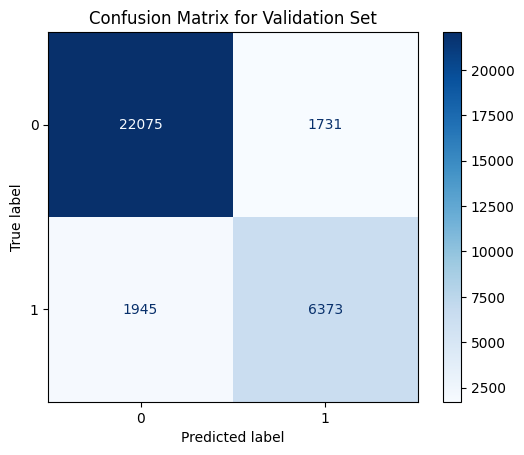

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for Validation Set")
plt.show()

In [28]:
# Test set results

In [32]:
y_pred_test = model.predict(X_test_scaled)

In [33]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.9177    0.9262    0.9219    102026
           1     0.7829    0.7622    0.7724     35648

    accuracy                         0.8837    137674
   macro avg     0.8503    0.8442    0.8472    137674
weighted avg     0.8828    0.8837    0.8832    137674



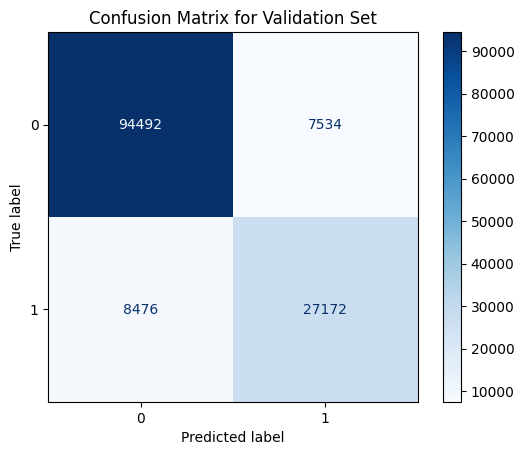

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for Validation Set")
plt.show()